In [1]:
from modules.download_images import download_images
from modules.blip import *
from modules.openai import *

c:\Users\khoda\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
questions=['does this image have a playground?','does this image have drop ceiling?','is the property complete?',
           'does this image have chandeliers?','does it have a basketball net?','are there houses in the image?',
           'is the wall clean?','is there a fireplace in the image','are the walls marble?',
           'is there a computerized game in this image',' is there a moving bike in this image?',
           'is there a statue of a bear in this image?','is there an statue in this image?']
answer=['yes','no','no','yes','yes','no','no','yes','yes','yes','no','no','yes']

In [3]:
image_files = download_images()

Successfully downloaded ./images\IMG-E7312496_2.jpg
Successfully downloaded ./images\IMG-W9049857_3.jpg
Successfully downloaded ./images\IMG-W7299676_19.jpg
Successfully downloaded ./images\IMG-N9052433_12.jpg
Successfully downloaded ./images\IMG-N9052433_19.jpg
Successfully downloaded ./images\IMG-Z8083610_6.jpg
Successfully downloaded ./images\IMG-W9235941_17.jpg
Successfully downloaded ./images\IMG-W9018907_11.jpg
Successfully downloaded ./images\IMG-W9018907_23.jpg
Successfully downloaded ./images\IMG-W9052988_2.jpg
Successfully downloaded ./images\IMG-W9052988_5.jpg
Successfully downloaded ./images\IMG-C9051345_2.jpg
Successfully downloaded ./images\IMG-W8342790_3.jpg


In [4]:
descriptions_blip = describe_images_blip(image_files,questions)
# plot_images_with_descriptions(descriptions_blip)

c:\Users\khoda\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 2/2 [00:22<00:00, 11.11s/it]


tensor([[ 4420, 50118]], device='cuda:0') yes
tensor([[2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437,
         2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437,
         2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437,
         2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437, 2537, 1437,
         2537, 1437]], device='cuda:0') Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â
tensor([[ 2537,  4420, 50118]], device='cuda:0') Â yes
tensor([[1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437,
         1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437,
         1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437,
         1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437, 1437,
         1437]], device='cuda:0') 
tensor([[ 2537,   117, 50118]], device='cuda:0') Â no
tensor([[ 4420, 50118]], device='cuda:0') yes
tensor([[28784, 50118]], d

In [5]:
descriptions_openai = describe_images_openai(image_files,questions)
# plot_images_with_descriptions(descriptions_openai)

In [6]:
descriptions_blip

[('./images\\IMG-E7312496_2.jpg', 'yes'),
 ('./images\\IMG-W9049857_3.jpg',
  'Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â Â'),
 ('./images\\IMG-W7299676_19.jpg', 'Â yes'),
 ('./images\\IMG-N9052433_12.jpg', ''),
 ('./images\\IMG-N9052433_19.jpg', 'Â no'),
 ('./images\\IMG-Z8083610_6.jpg', 'yes'),
 ('./images\\IMG-W9235941_17.jpg', '____'),
 ('./images\\IMG-W9018907_11.jpg', 'yes'),
 ('./images\\IMG-W9018907_23.jpg', 'yes'),
 ('./images\\IMG-W9052988_2.jpg', 'yes'),
 ('./images\\IMG-W9052988_5.jpg', 'no'),
 ('./images\\IMG-C9051345_2.jpg', ''),
 ('./images\\IMG-W8342790_3.jpg', 'Â?yes')]

In [7]:
descriptions_openai

[('./images\\IMG-E7312496_2.jpg', 'Yes.'),
 ('./images\\IMG-W9049857_3.jpg', 'No.'),
 ('./images\\IMG-W7299676_19.jpg', 'No.'),
 ('./images\\IMG-N9052433_12.jpg', 'Yes.'),
 ('./images\\IMG-N9052433_19.jpg', 'Yes.'),
 ('./images\\IMG-Z8083610_6.jpg', 'No.'),
 ('./images\\IMG-W9235941_17.jpg', 'No.'),
 ('./images\\IMG-W9018907_11.jpg', 'Yes.'),
 ('./images\\IMG-W9018907_23.jpg', 'Yes.'),
 ('./images\\IMG-W9052988_2.jpg', 'Yes.'),
 ('./images\\IMG-W9052988_5.jpg', 'No.'),
 ('./images\\IMG-C9051345_2.jpg', 'No.'),
 ('./images\\IMG-W8342790_3.jpg', 'No.')]

In [8]:
def evaluate(pred,gt):
    accuracy=0
    for i in range(len(gt)):
        accuracy+=int(gt[i].lower() in pred[i].lower())
    accuracy=accuracy/len(gt)
    return accuracy

In [9]:
evaluate(list(map(lambda x: x[1],descriptions_blip)),answer)

0.46153846153846156

In [10]:
evaluate(list(map(lambda x: x[1],descriptions_openai)),answer)

0.9230769230769231

In [11]:
new_description=[]
for i in range(len(descriptions_blip)):
    new_description.append((descriptions_blip[i][0],f'{questions[i]}\nanswer_blip: {descriptions_blip[i][1]}\nanswer_openai: {descriptions_openai[i][1]}'))

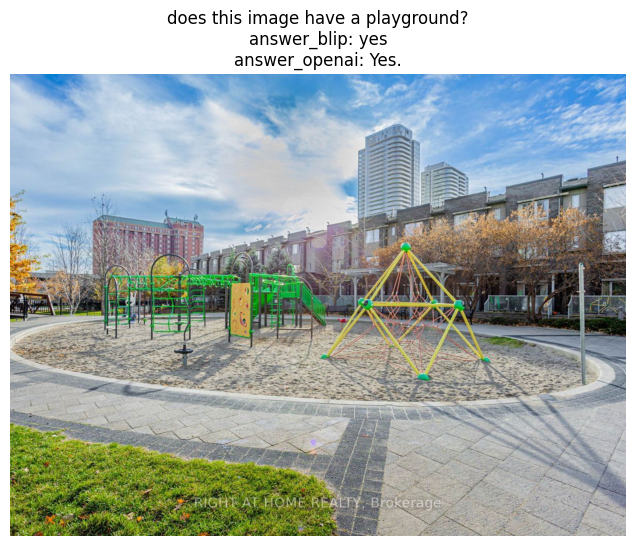

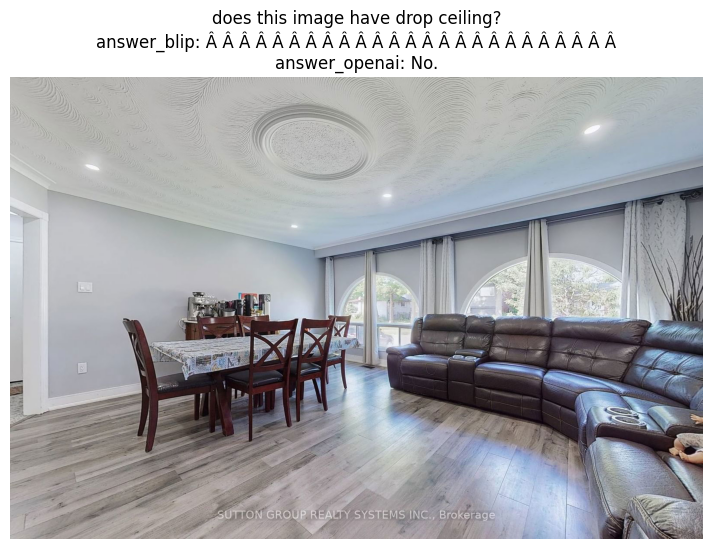

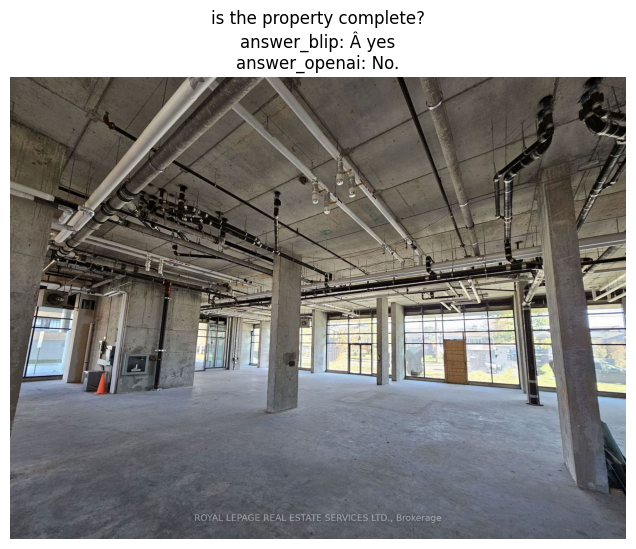

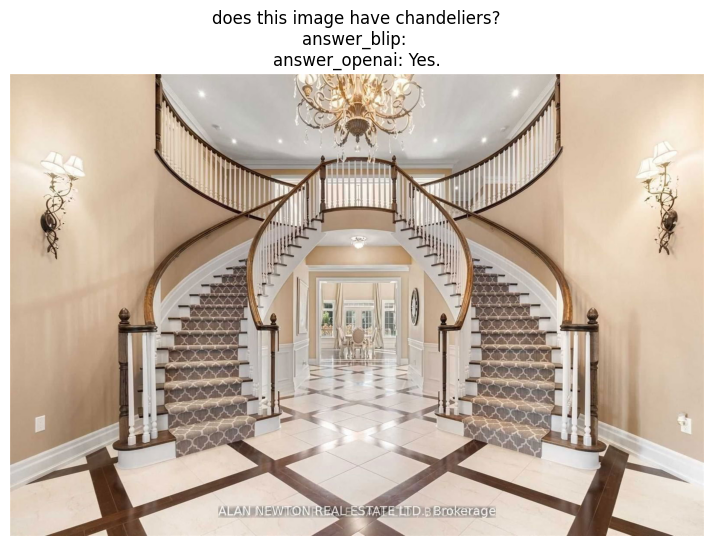

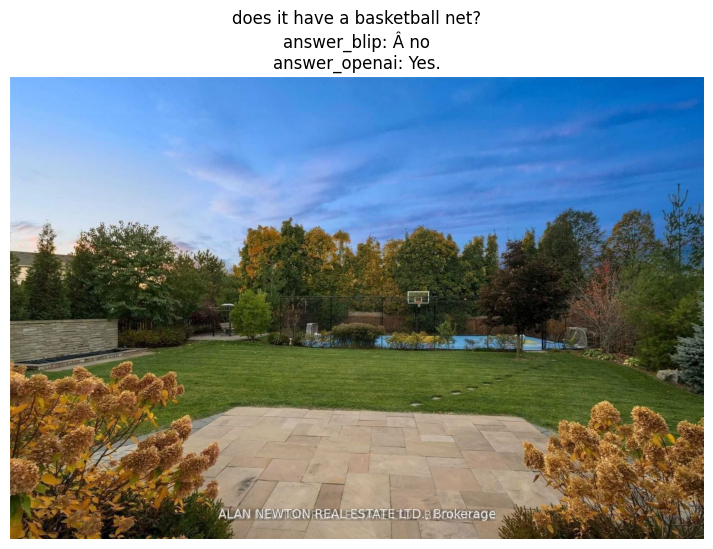

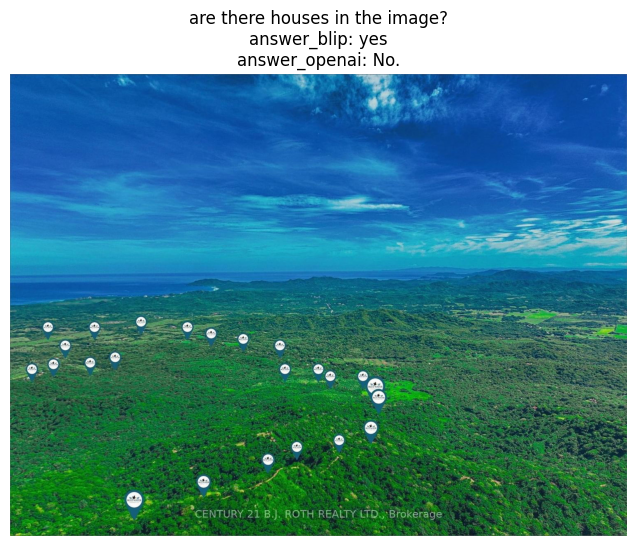

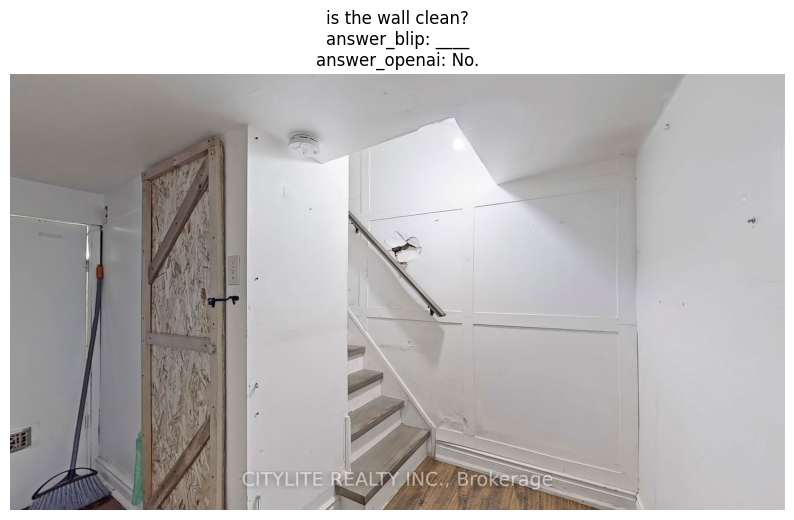

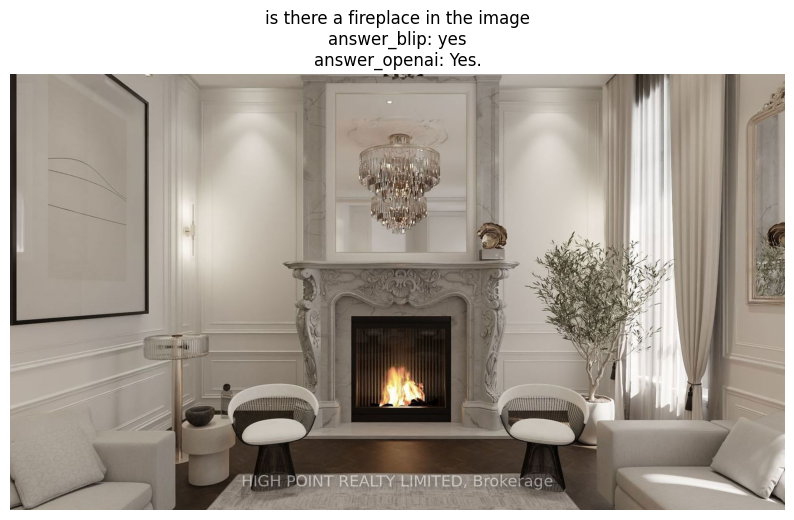

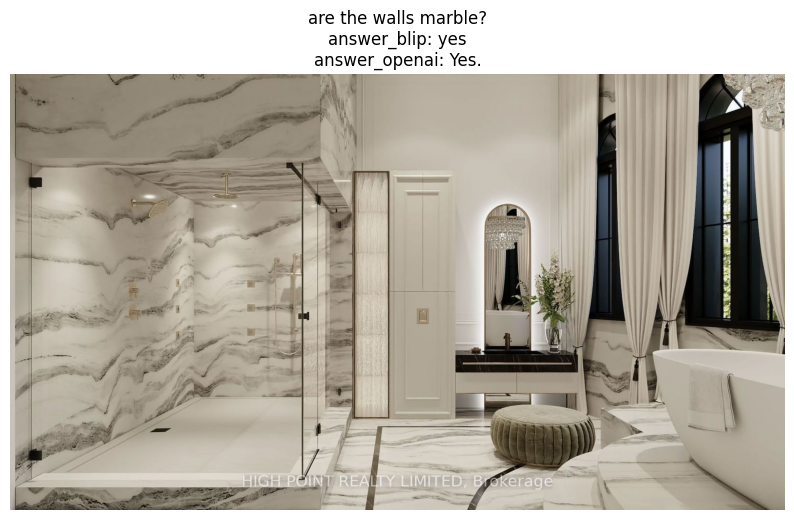

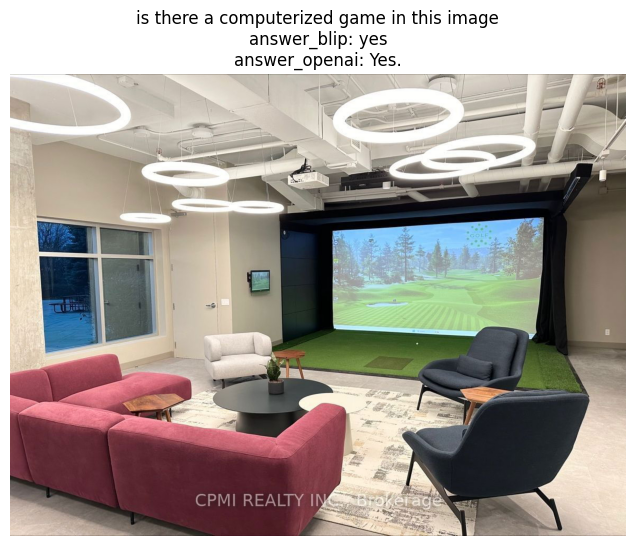

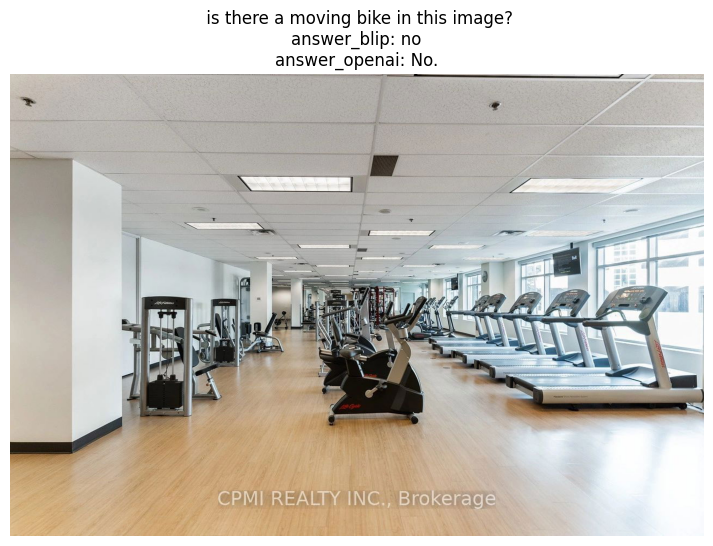

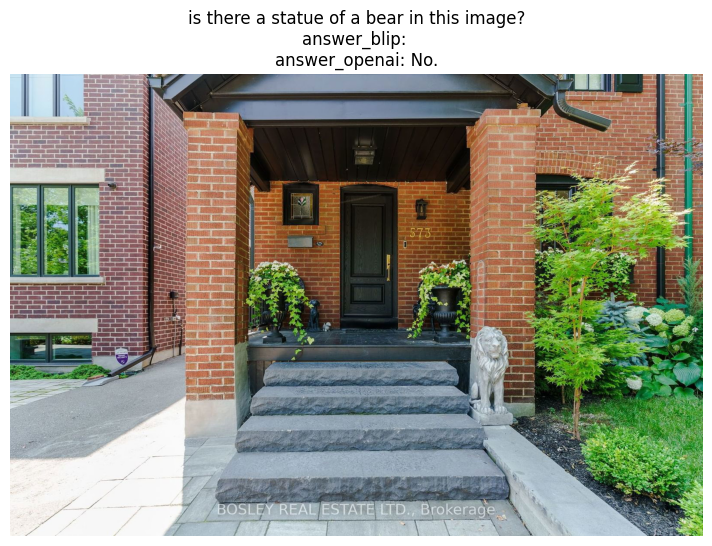

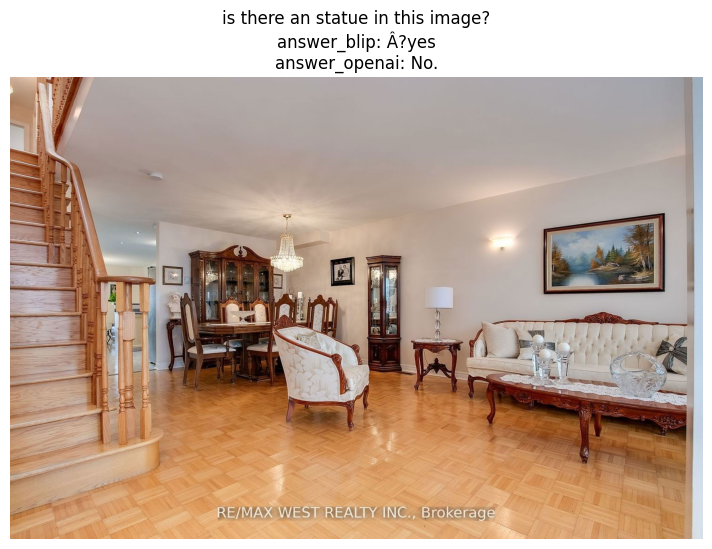

In [12]:
plot_images_with_descriptions(new_description)